<a href="https://colab.research.google.com/github/nisar009/Kaggle_Notebooks/blob/master/Human_Protein_Atlas_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Protein Atlas Image Classification

### Setting up Colab for fastai

In [0]:
%%capture
!curl https://course-v3.fast.ai/setup/colab | bash

### Downloading the data from Kaggle

In [0]:
%%capture
!pip install kaggle-cli

In [0]:
!cd data && mkdir -p protein && cd protein && kg download -u nisar009 -p p@55w0rd -c human-protein-atlas-image-classification

In [0]:
!cd data/protein && unzip train.zip

In [12]:
!cd data/proteins/ && ls

train  train.csv


### fastai imports

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
%matplotlib inline

###Analysing the training images

First lets check how many images are there in the training set

In [16]:
path = Config.data_path()/'proteins'
path

PosixPath('/root/.fastai/data/proteins')

In [40]:
import os

images = os.listdir(path/'train')
len(images)/4

30198.5

In [18]:
# delete any images that is not completely download
verify_images(path/'train', delete=True, max_workers=8)

fe3e2b08-bba3-11e8-b2b9-ac1f6b6435d0_yellow.png


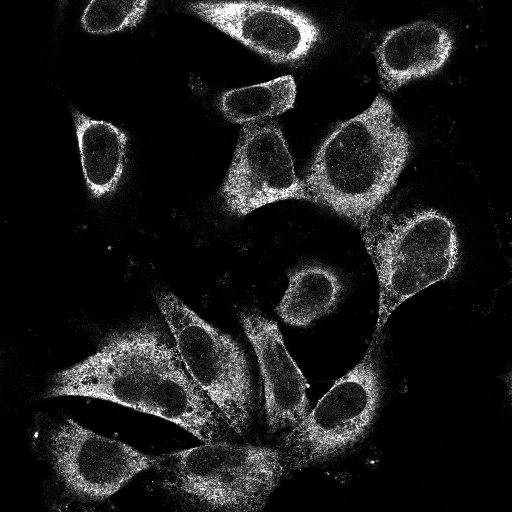

In [51]:
idx = np.random.randint(len(images))
print(images[idx])
open_image(path/'train'/images[idx])

Labels of the image is given in **train.csv**

In [52]:
df = pd.read_csv(path/'train.csv')
df.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31072 entries, 0 to 31071
Data columns (total 2 columns):
Id        31072 non-null object
Target    31072 non-null object
dtypes: object(2)
memory usage: 485.6+ KB
